In [1]:
#libs de dados
import pandas as pd
import numpy as np

#libs graficas
import matplotlib.pyplot as plt
import seaborn as sn

#avisos
import warnings
warnings.filterwarnings('ignore')

#config Pandas
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

#config Matplot
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')


baseData= pd.read_csv('./house_data.csv')

print('dimensão da base= '+ str(baseData.shape))

dimensão da base= (10692, 13)


In [3]:
#vendo dados
baseData.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
baseData.drop(columns=['fire insurance (R$)','total (R$)'],inplace=True)
baseData.isnull().sum().sort_values(ascending=False)


city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [5]:
#campos Unicos
baseData.nunique()


city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64


EDA

In [7]:
categoryColumns= baseData.columns[baseData.dtypes == object]  
numbersColumns= baseData.columns[baseData.dtypes != object]  

#analise dos categoricos
print(categoryColumns)

for column in categoryColumns:
    column
    baseData[column].value_counts(normalize=True)*100
    

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')


In [ ]:
#consertando dados
baseData.loc[baseData['floor']== '301']
baseData.iloc[2562,5] = 30

In [ ]:
#substituindo o - por 0
baseData['floor'] = baseData['floor'].apply(lambda r : 0 if r == '-' else r)

#substituindo tipos de dados
baseData['floor'] = pd.to_numeric(baseData['floor'])


Text(0.5, 0.98, 'Análise das Variaveis')

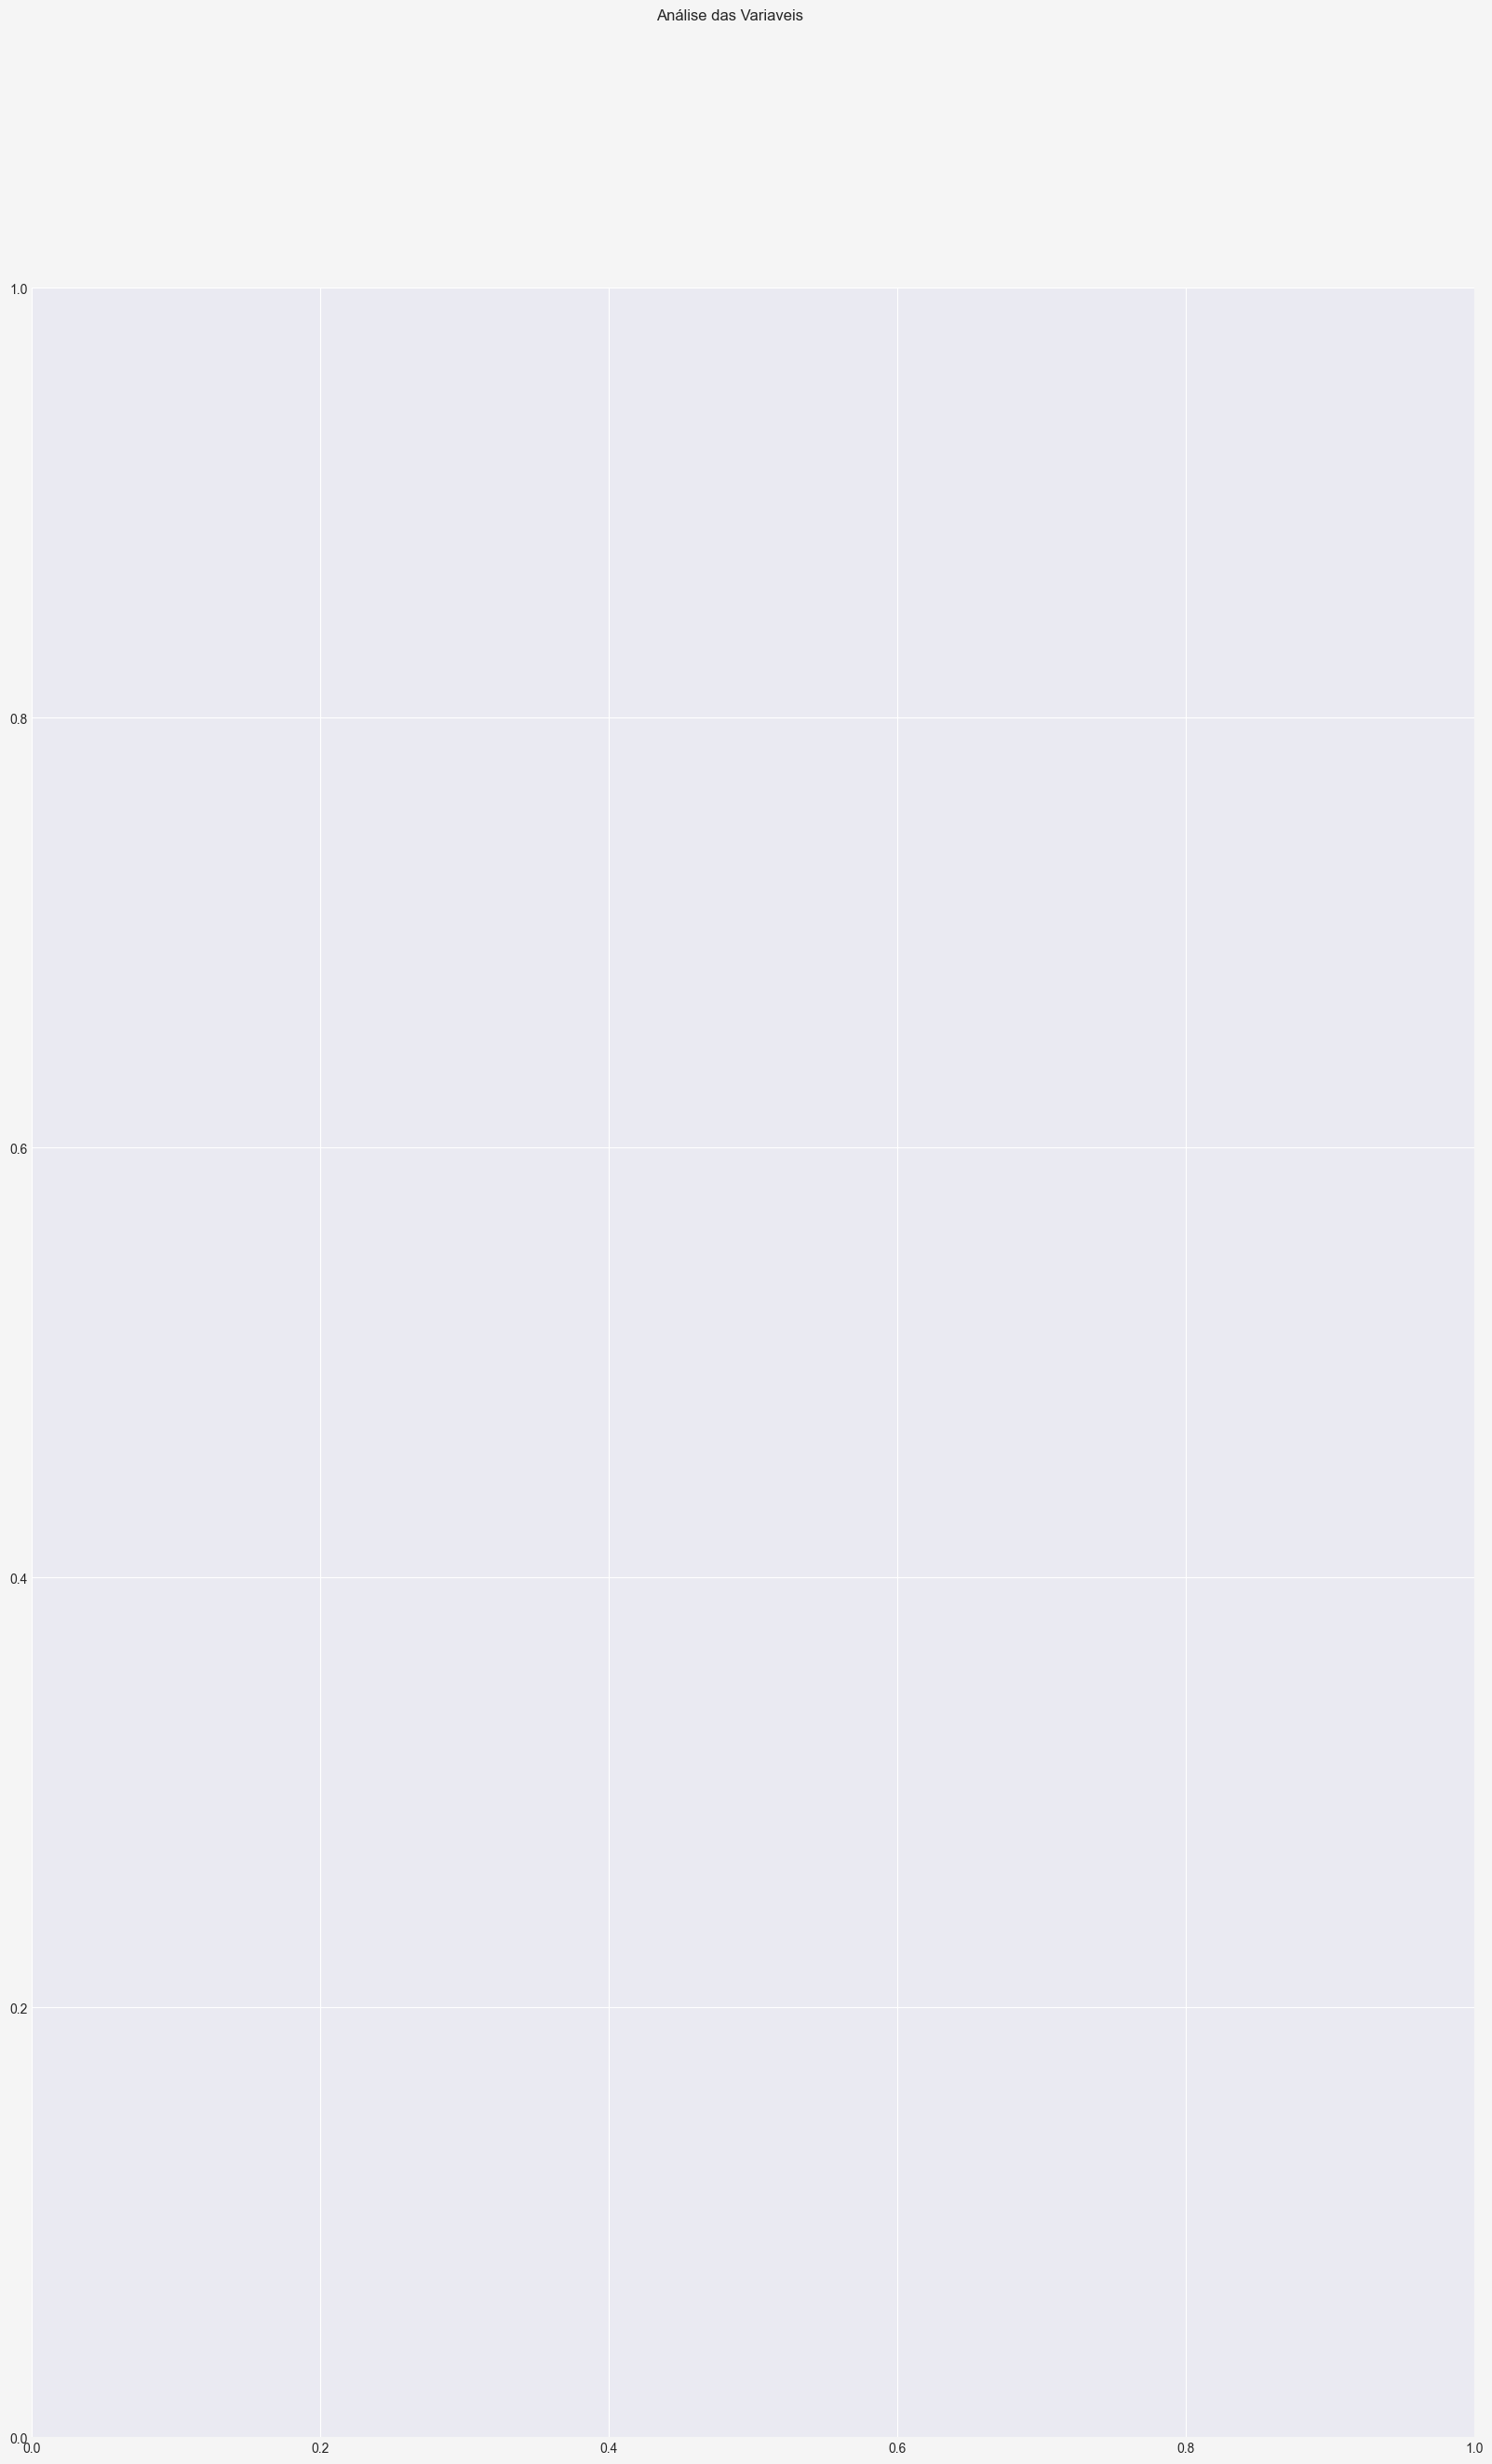

In [8]:

#GRID - GRAFICOS

#tamanho
Figura,eixo = plt.subplots(figsize=(20,30))


#cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de Cores
paletteOfColors=sn.color_palette('flare', len(numbersColumns) * 2)

#Titulo
plt.suptitle('Análise das Variaveis')